In [1]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import ast

In [2]:
# Load data
df = pd.read_csv('df_rosaliarev_preprocessed.csv')

In [3]:
# Gabungkan semua token dari semua ulasan menjadi satu daftar besar
import ast
df['tokens_stemmed'] = df['tokens_stemmed'].apply(ast.literal_eval)
all_tokens = [token for sublist in df['tokens_stemmed'] for token in sublist]

# Hitung frekuensi setiap token
freq_dist = FreqDist(all_tokens)

# Tampilkan 50 kata paling umum
print("--- 50 Kata Paling Sering Muncul (Sebelum Pembaruan Stopwords) ---")
most_common_words = freq_dist.most_common(50)
for word, count in most_common_words:
    print(f"{word}: {count}")

--- 50 Kata Paling Sering Muncul (Sebelum Pembaruan Stopwords) ---
aplikasi: 982
tiket: 665
gak: 496
ga: 361
yg: 357
rosalia: 336
bus: 327
kode: 297
bagus: 289
update: 287
layan: 271
bayar: 270
login: 247
baik: 247
agen: 246
tolong: 229
aja: 219
bantu: 216
mudah: 212
jam: 205
daftar: 201
indah: 190
susah: 190
ok: 189
pesan: 167
online: 166
pilih: 164
email: 164
nyaman: 159
beli: 144
otp: 141
jalan: 140
bis: 139
udah: 137
berangkat: 133
booking: 133
verifikasi: 132
mantap: 129
gk: 129
sen: 125
kasih: 123
akun: 123
banget: 118
coba: 118
kirim: 118
kalo: 115
rosin: 115
armada: 111
cari: 111
buka: 105


In [4]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.StopWordRemover.StopWordRemover import StopWordRemover
from Sastrawi.Dictionary.ArrayDictionary import ArrayDictionary

# Ambil daftar stopword default
stopword_factory = StopWordRemoverFactory()
default_stopwords = stopword_factory.get_stop_words()

# Tambahkan stopwords baru berdasarkan analisis frekuensi
new_stopwords = ['yg', 'ga', 'gk', 'gak', 'nya', 'aja', 'kok', 'pas', 'sih', 'udah', 'deh', 'kalo', 'klo', 'ya', 'jg', 'jd', 'aja', 'tdk', 'nih', 'sy', 'bs', 'dgn', 'trs', 'aja', 'pas', 'udh', 'kyk', 'tp', 'bgt', 'min', 'kak', 'utk', 'gx', 'woy', 'ok', 'banget', 'kasih', 'coba']

In [5]:
# Gabungkan kedua daftar dan hilangkan duplikat
final_stopwords = list(set(default_stopwords + new_stopwords))

# Buat kamus khusus untuk Sastrawi dari daftar stopwords kita
dictionary = ArrayDictionary(final_stopwords)
# Buat stopword remover baru dengan kamus tersebut
custom_stopword_remover = StopWordRemover(dictionary)

In [6]:
# Terapkan stopword removal yang baru ke token yang sudah di-stem
def remove_custom_stopwords(tokens):
    # Menggunakan custom stopword remover
    cleaned_text = custom_stopword_remover.remove(' '.join(tokens))
    return cleaned_text.split()

df['tokens_final'] = df['tokens_stemmed'].apply(remove_custom_stopwords)


In [12]:
# Buat kolom final_content versi 2
df['final_content_v2'] = df['tokens_final'].apply(lambda x: ' '.join(x))

# Tampilkan perbandingan
print("\n--- Perbandingan Setelah Pembersihan Ulang ---")
display(df[['final_content', 'final_content_v2']].head())


--- Perbandingan Setelah Pembersihan Ulang ---


,final_content,final_content_v2
0,apk muas jauh calo tiket harga relatif murah t...,apk muas calo tiket harga relatif murah pusat ...
1,rosalia indah tanggung salah langgan mesan via...,rosalia indah tanggung salah langgan mesan via...
2,mantap kalo adain rute cilegon lasem,mantap adain rute cilegon lasem
3,aplikasi bagus tolong paging screen history di...,aplikasi bagus tolong paging screen history di...
4,apknya login via nomor telponuntuk developer baik,apknya login via nomor telponuntuk developer


In [13]:
# Instalasi library wordcloud jika belum ada
!pip install wordcloud -q

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [14]:
# Buat label sentimen berdasarkan skor
def get_sentiment(score):
    if score >= 4:
        return 'Positif'
    elif score <= 2:
        return 'Negatif'
    else:
        return 'Netral'
    
df['sentiment'] = df['score'].apply(get_sentiment)

In [15]:
# Simpan checkpoint kedua
CUSTOM_STOPWORDS_FILE = 'df_rosaliarev_custom_stopwords.csv'
df.to_csv(CUSTOM_STOPWORDS_FILE, index=False)

print("Pembersihan ulang dengan stopwords baru selesai.")
print(f"Data tersimpan di '{CUSTOM_STOPWORDS_FILE}'")

Pembersihan ulang dengan stopwords baru selesai.
Data tersimpan di 'df_rosaliarev_custom_stopwords.csv'


In [16]:
# Pisahkan teks berdasarkan sentimen
positive_reviews = ' '.join(df[df['sentiment'] == 'Positif']['final_content_v2'])
negative_reviews = ' '.join(df[df['sentiment'] == 'Negatif']['final_content_v2'])

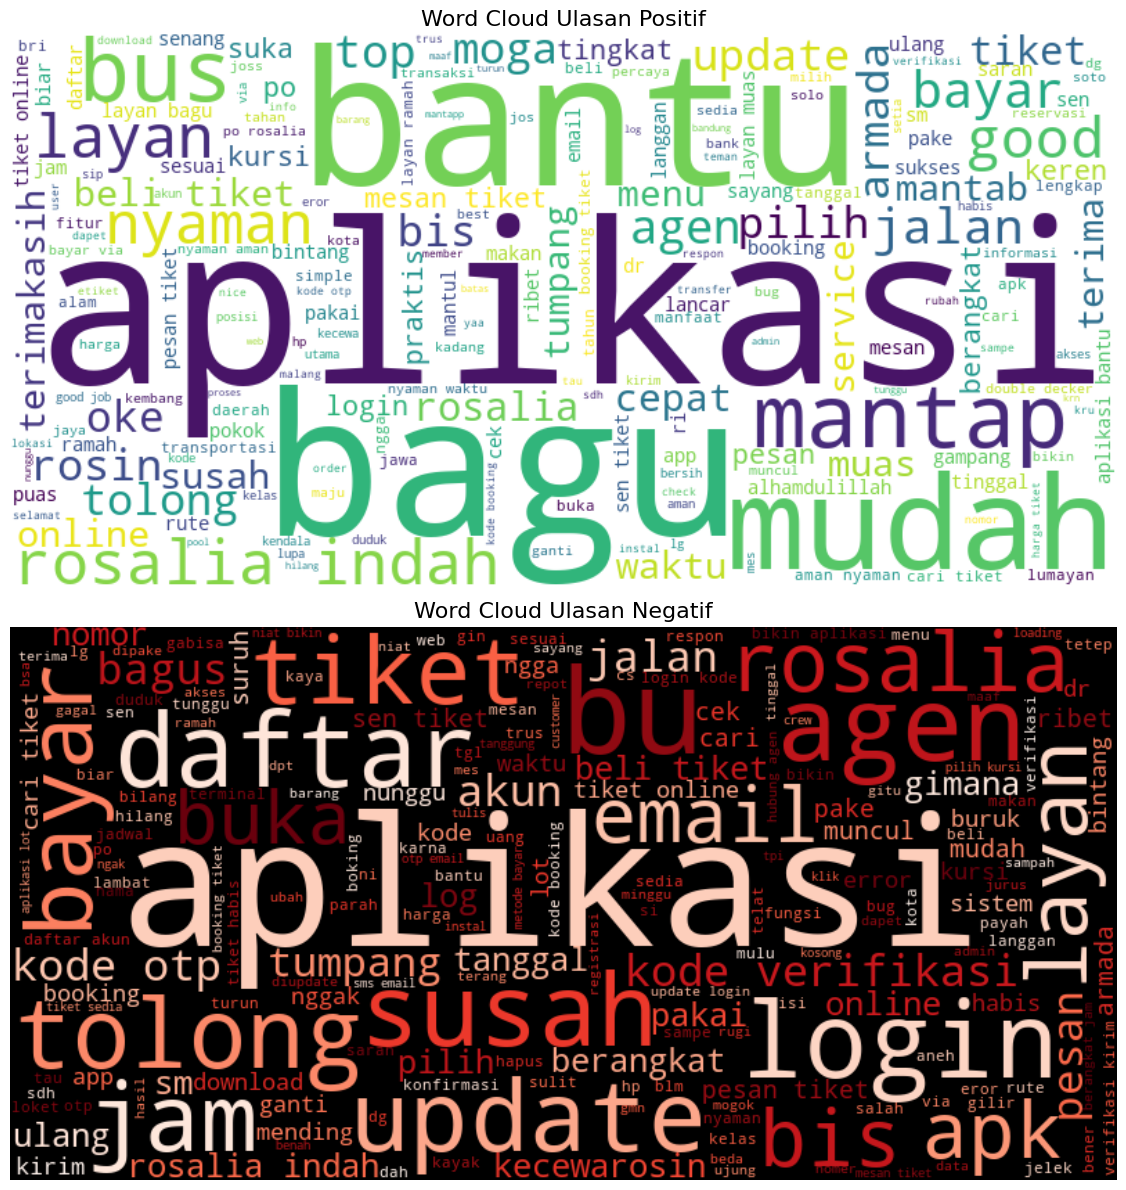

In [17]:
# Buat Word Cloud untuk ulasan POSITIF
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(positive_reviews)

# Buat Word Cloud untuk ulasan NEGATIF
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)

# Tampilkan Word Clouds
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].set_title('Word Cloud Ulasan Positif', fontsize=16)
axes[0].axis('off')

axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].set_title('Word Cloud Ulasan Negatif', fontsize=16)
axes[1].axis('off')

plt.tight_layout()
plt.show()
